In [4]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

In [5]:
df = pd.read_csv("C:\\Users\\parth\\Downloads\\Internship\\adult.csv")

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
print(df.shape)

(32561, 15)


In [12]:
print('Dataset columns with null values:\n', df.isnull().sum())


Dataset columns with null values:
 age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [13]:
for i in df.columns:
    print("Column Name:",i, "Count",df[i].nunique())
    print("Unique Values",df[i].unique())
    print("\n")

Column Name: age Count 73
Unique Values [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]


Column Name: workclass Count 9
Unique Values ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']


Column Name: fnlwgt Count 21648
Unique Values [ 77053 132870 186061 ...  34066  84661 257302]


Column Name: education Count 16
Unique Values ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']


Column Name: education.num Count 16
Unique Values [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]


Column Name: marital.status Count 7
Unique Values ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Marri

In [14]:
freq_workclass = df['workclass'].value_counts().idxmax()
freq_occupation = df['occupation'].value_counts().idxmax()
freq_country = df['native.country'].value_counts().idxmax()

In [15]:
col = ['workclass', 'occupation', 'native.country']
val = [freq_workclass, freq_occupation, freq_country]
for i in range(len(col)):
    df[col[i]].fillna(val[i], inplace=True)
print('Dataset columns with null values:\n', df.isnull().sum())

Dataset columns with null values:
 age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
numeric_columns = ['fnlwgt', 'capital.gain', 'capital.loss']

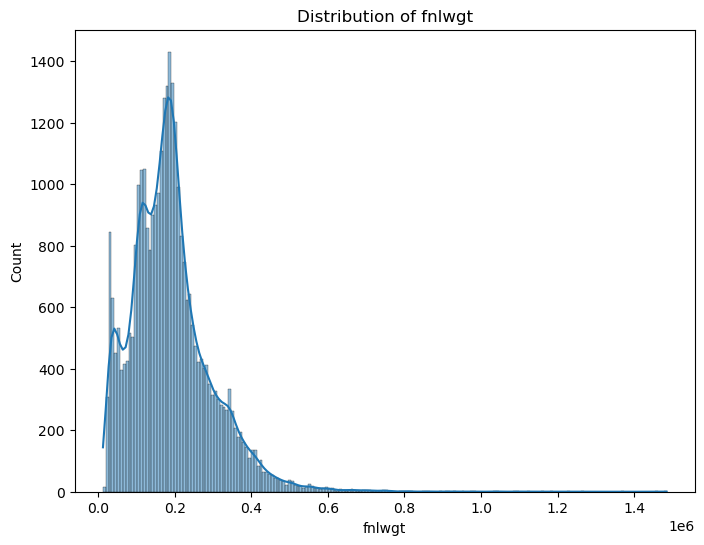

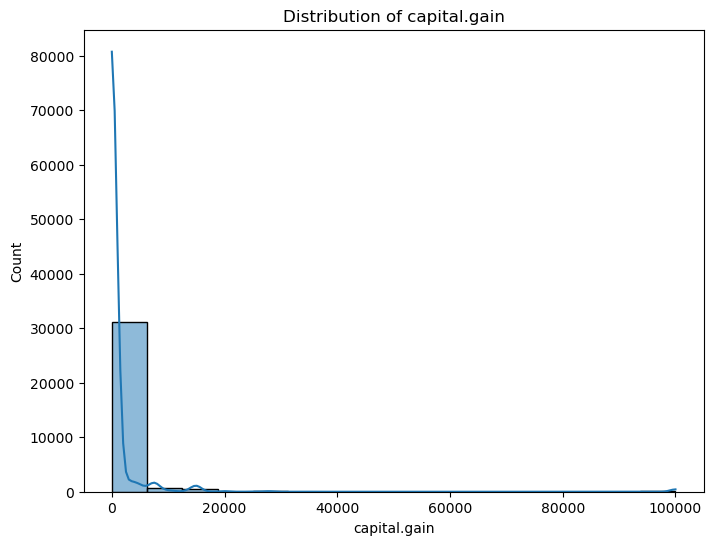

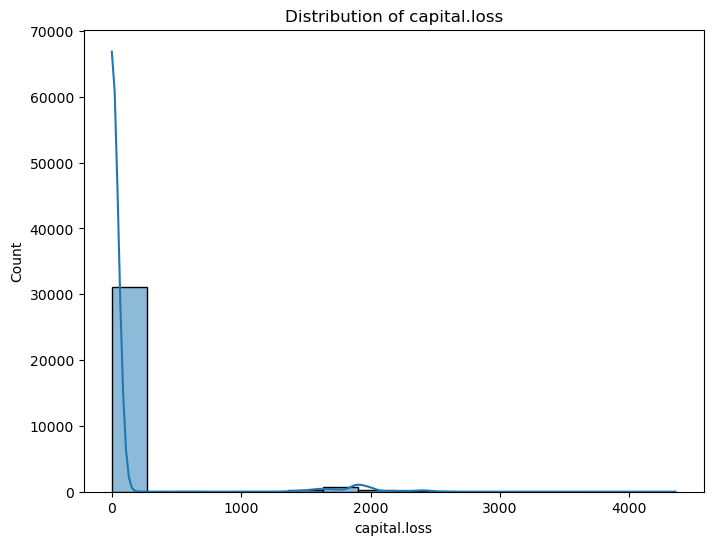

In [18]:
for column in numeric_columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.histplot(data=df, x=column, kde=True)  # Use kde=True to overlay a kernel density estimate
    plt.title(f'Distribution of {column}')
    plt.show()

In [19]:
df['AgeBin'] = pd.cut(df['age'].astype(int), 5)
df['HourBin'] = pd.cut(df['hours.per.week'].astype(int), 5)

In [20]:
X = df.drop(['income','age','hours.per.week'], axis=1)
y = df['income']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.39, random_state = 0)

In [22]:
for i in ['capital.gain', 'capital.loss','fnlwgt']:
    X_train[i] = np.log1p(X_train[i])
    X_test[i] = np.log1p(X_test[i])

In [23]:
categoric_columns = ['relationship', 'race', 'sex']

In [24]:
X_train = pd.get_dummies(data = X_train, columns = categoric_columns)
X_test = pd.get_dummies(data = X_test, columns = categoric_columns)

In [25]:
le =  LabelEncoder()

In [26]:
categoric_columns = X_train.select_dtypes(include=['object','category']).columns

In [27]:
for feature in categoric_columns:
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [31]:
model = LogisticRegression(max_iter=1000, solver = 'saga')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
print('Logistic Regression accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score: 0.8340
